*Привет Стас! Видимо, прошлая версия не сохранилась. Загрузил восстановленную версию. Надеюсь, сейчас все нормально будет отображаться* 

# Задание 1. Проведите исследование

    Откроем файл с данными (pr_data) со статистикой о платёжеспособности банковских клиентов
 
    Задача. Влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок?
    
    Описание данных

- children — количество детей в семье
- days_employed — трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — образование клиента
- education_id — идентификатор образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — доход в месяц

In [5]:
# Импортируем библиотеку pandas и прочитаем файл с исходными данными
import pandas as pd
pr_data = pd.read_csv('/datasets/data.csv')

    Изучим общую информацию о данных, используя info() метод.

In [6]:
pr_data.info()
pr_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Общее количество значений в данных 21525. В двух параметрах значений существенно меньше: опыт работы и доход.

In [7]:
print(pr_data.isnull().sum())

data_null = pr_data[pr_data["days_employed"].isnull()]
'Значения отсутствуют в: {:.1%}' .format(len(data_null) / len(pr_data))

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


'Значения отсутствуют в: 10.1%'

Отсутствует количественные значения data_employed и total_income в 10% от общих данных. Рассмотрим уникальные значения данных для каждого столбца.

In [8]:
for row in pr_data: 
  print(pr_data[row].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64
-986.927316       1
-7026.359174      1
-4236.274243      1
-6620.396473      1
-1238.560080      1
-3047.519891      1
-7373.150635      1
-1048.380461      1
-4906.125062      1
-1893.222792      1
-849.764227       1
-1741.489608      1
-5135.928528      1
-1453.358707      1
-4977.646061      1
 396078.542064    1
-1399.361282      1
-1645.463049      1
 386155.404320    1
-2793.736218      1
-1171.322169      1
-158.140270       1
-978.830019       1
-941.943913       1
-5208.815041      1
-951.868467       1
-501.078443       1
-725.971741       1
-2308.532389      1
-666.570650       1
                 ..
-1478.092467      1
-568.348795       1
-3453.437905      1
-725.595743       1
-2013.336934      1
-215.245268       1
-3208.792519      1
-1799.455775      1
-979.587235       1
-1312.334477      1
-2184.000174      1
-1218.820922      1
 356642

Выводы:
Столбец "children". Ошибочные значения "20", -1. Поменять на 2 и 1 соответственно
Столбец "gender". Строки с пропущенными данными.
Столбец "education". Дубликаты в названиях. Привести к одному регистру.
Столбец "dob_days". Нулевые значения.
Столбец "purpose". Много дубликатов с похожими или идентичными причинами. Требуется объеденить в одинаковые значения.
Столбец "days_employed". Положительные и отрицательные значения. Значения могут быть только Integer.
Столбец "total_income". Пропущенные значения (2174)
Столбец "days_employed". Пропущенные значения (2174)

In [9]:
### Столбец Children
pr_data['children'] = pr_data['children'].replace(20, 2)
pr_data['children'] = pr_data['children'].replace(-1, 1)

###  Столбец Gender
# Узнаем количество пропущенных значений
pr_data[pr_data['gender'] == 'XNA'].count()

# Строка с пропущенным значением всего одна. Ее можно исключить из выборки. 
pr_data = pr_data[pr_data['gender'] != 'XNA']

### Столбец dob_years. 101 пропущенное значение. 
pr_data['dob_years'].min()
pr_data['dob_years'].max()

### Столбец education 
# Приведем все значения к одному регистру
pr_data['education'] = pr_data['education'].str.lower()
# В столбце education теперь 5 уникальных значений
pr_data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [10]:
# Для того чтобы заполнить пропущенные значения посчитаем медиану возраста клиента в годах (dob_years) для каждого типа занятости

income_type_gr = pr_data.groupby('income_type')['dob_years'].median()
income_type_gr 

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

In [12]:
# pr_data.is_copy = False

# Заполним пропущенные значения в столбце "dob_years" на основании медианы для каждого типа дохода
pr_data.loc[(pr_data['income_type'] == 'пенсионер') & (pr_data['dob_years'] == 0), 'dob_years'] = 60
pr_data.loc[(pr_data['income_type'] == 'студент') & (pr_data['dob_years'] == 0), 'dob_years'] = 22
pr_data.loc[(pr_data['income_type'] == 'сотрудник') & (pr_data['dob_years'] == 0), 'dob_years'] = 39
pr_data.loc[(pr_data['income_type'] == 'предприниматель') & (pr_data['dob_years'] == 0), 'dob_years'] = 42.5
pr_data.loc[(pr_data['income_type'] == 'компаньон') & (pr_data['dob_years'] == 0), 'dob_years'] = 39
pr_data.loc[(pr_data['income_type'] == 'госслужащий') & (pr_data['dob_years'] == 0), 'dob_years'] = 40
pr_data.loc[(pr_data['income_type'] == 'в декрете') & (pr_data['dob_years'] == 0), 'dob_years'] = 39
pr_data.loc[(pr_data['income_type'] == 'безработный ') & (pr_data['dob_years'] == 0), 'dob_years'] = 38

# Сделаем проверку 
pr_data['dob_years'].isnull().sum()

0

In [13]:
# Сделаем графическую проверку данных. Данные теперь распределны от 19 до 75 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = pr_data['dob_years']
plt.hist(x, bins=20)
plt.ylabel('No of times')
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
### Чтобы заполнить пропущенные значения в столбце трудовой стаж (days_employed) в днях можно взять медиану для каждой группы возраста. Для этого создадим новый столбец "age_group"
# 1 группа: 19 - 30
# 2 группа: 30 - 40
# 3  группа: 40 - 55 
# 4  группа: 55 - 75

def days_employed(row):
    
    age = row['dob_years']

    if age <= 30:
        return '1 группа'
    
    if age <= 40 and age > 30:
        return '2 группа'
    
    if age <= 55 and age > 40:
        return '3 группа'
    
    if age <= 80 and age > 55:
        return '4 группа'

pr_data['age_group'] = pr_data.apply(days_employed, axis=1)

pr_data['days_employed'] = pr_data['days_employed'].fillna(0)
pr_data.isnull().sum()

pr_data.groupby('age_group')['days_employed'].mean()[0]

pr_data.loc[(pr_data['age_group'] == '1 группа') & (pr_data['days_employed'] == 0 ), 'days_employed'] = pr_data.groupby('age_group')['days_employed'].mean()[0]
pr_data.loc[(pr_data['age_group'] == '2 группа') & (pr_data['days_employed'] == 0 ), 'days_employed'] = pr_data.groupby('age_group')['days_employed'].mean()[1]
pr_data.loc[(pr_data['age_group'] == '3 группа') & (pr_data['days_employed'] == 0 ), 'days_employed'] = pr_data.groupby('age_group')['days_employed'].mean()[2]
pr_data.loc[(pr_data['age_group'] == '4 группа') & (pr_data['days_employed'] == 0 ), 'days_employed'] = pr_data.groupby('age_group')['days_employed'].mean()[3]

pr_data[pr_data['total_income'] == 0].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

In [15]:
# Чтобы заполнить пропущенные значения в столбце Total Income можно использовать медиану дохода для каждого типа дохода (income_type)

pr_data['total_income'] = pr_data['total_income'].fillna(0)

pr_data.groupby('income_type')['total_income'].median()

pr_data.loc[(pr_data['total_income'] == 0) & (pr_data['income_type'] == 'безработный'), 'total_income'] = pr_data.groupby('income_type')['total_income'].median()[0]
pr_data.loc[(pr_data['total_income'] == 0) & (pr_data['income_type'] == 'в декрете'), 'total_income'] = pr_data.groupby('income_type')['total_income'].median()[1]
pr_data.loc[(pr_data['total_income'] == 0) & (pr_data['income_type'] == 'госслужащий'), 'total_income'] = pr_data.groupby('income_type')['total_income'].median()[2]
pr_data.loc[(pr_data['total_income'] == 0) & (pr_data['income_type'] == 'компаньон'), 'total_income'] = pr_data.groupby('income_type')['total_income'].median()[3]
pr_data.loc[(pr_data['total_income'] == 0) & (pr_data['income_type'] == 'пенсионер'), 'total_income'] = pr_data.groupby('income_type')['total_income'].median()[4]
pr_data.loc[(pr_data['total_income'] == 0) & (pr_data['income_type'] == 'предприниматель'), 'total_income'] = pr_data.groupby('income_type')['total_income'].median()[5]
pr_data.loc[(pr_data['total_income'] == 0) & (pr_data['income_type'] == 'сотрудник'), 'total_income'] = pr_data.groupby('income_type')['total_income'].median()[6]
pr_data.loc[(pr_data['total_income'] == 0) & (pr_data['income_type'] == 'студент'), 'total_income'] = pr_data.groupby('income_type')['total_income'].median()[7]

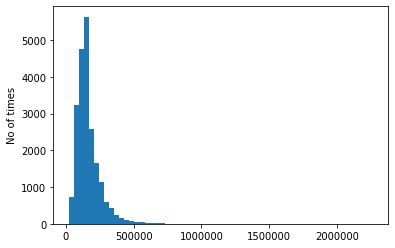

In [16]:
# Проверим новые данные для дохода в месяц
x = abs(pr_data['total_income'])
plt.hist(x, bins=60)
plt.ylabel('No of times')
plt.show()

In [17]:
# Сгрупируем данные о доходе в месяц 
# 1 группа: 15 - 55
# 2 группа: 55 - 120
# 3  группа: 120 - 200
# 4  группа: 200 - 2000000

def income_group(row):
    
    income = row['total_income']

    if income <= 55000:
        return 'Доход 15-55'
    
    if income <= 120000 and income > 55000:
        return 'Доход 55-20'
    
    if income <= 200000 and income > 120000:
        return 'Доход 120-200'
    
    if income <= 4000000 and income > 200000:
        return 'Доход > 200'

pr_data['income_gr'] = pr_data.apply(income_group, axis=1)

pr_data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_gr
0,1,-8437.673028,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,3 группа,Доход > 200
1,1,-4024.803754,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,2 группа,Доход 55-20
2,0,-5623.422610,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,2 группа,Доход 120-200
3,3,-4124.747207,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,2 группа,Доход > 200
4,0,340266.072047,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,3 группа,Доход 120-200
5,0,-926.185831,27.0,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,1 группа,Доход > 200
6,0,-2879.202052,43.0,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,3 группа,Доход > 200
7,0,-152.779569,50.0,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,3 группа,Доход 120-200
8,2,-6929.865299,35.0,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,2 группа,Доход 55-20
9,0,-2188.756445,41.0,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,3 группа,Доход 120-200


## Дубликаты

In [18]:
# Посчитаем количество дубликатов в наборе данных. Дубликаты в категориях были исключены выше для каждого столбца. 
pr_data.duplicated().sum()

# Удалим дубликаты используя метод drop_duplicates() с новой индексацией
pr_data = pr_data.drop_duplicates().reset_index(drop=True)

## Изменить тип данных

In [19]:
# Изучим текущие типы данных 
pr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 14 columns):
children            21453 non-null int64
days_employed       21453 non-null float64
dob_years           21453 non-null float64
education           21453 non-null object
education_id        21453 non-null int64
family_status       21453 non-null object
family_status_id    21453 non-null int64
gender              21453 non-null object
income_type         21453 non-null object
debt                21453 non-null int64
total_income        21453 non-null float64
purpose             21453 non-null object
age_group           21453 non-null object
income_gr           21453 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 2.3+ MB


In [20]:
# Для изменения типа данных используем метод astype() так как нам нужно изменить float на int64
# Изменим значения столбца total_income в числовой тип int64 (целое число) 
pr_data['total_income'] = pr_data['total_income'].astype('int')

# Изменим значения столбца dob_years в числовой тип int64 (целое число) 
pr_data['dob_years'] = pr_data['dob_years'].astype('int')

# Изменим значения столбца days_employed в числовой тип int64 (целое число) и возьмем значения по модулю 
pr_data['days_employed'] = pr_data['days_employed'].astype('int')
pr_data['days_employed'] = abs(pr_data['days_employed'])

## Лемматизация целей кредита

In [21]:
# Импортируем библиотеку с функцией лемматизации на русском языке — pymystem3
import json
from pymystem3 import Mystem
from collections import Counter
m = Mystem()

In [22]:
# Создадим функцию которая возвращает строку с ключевыми словами цели кредита
def lemma_pur(purpose):
    lemma = ' ' .join(m.lemmatize(purpose))
    return lemma

pr_data['purpose_word'] = pr_data['purpose'].apply(lemma_pur)

# Отобразим уникальные значения (цели кредита)
pr_data['purpose_word'].unique()

array(['покупка   жилье \n', 'приобретение   автомобиль \n',
       'дополнительный   образование \n', 'сыграть   свадьба \n',
       'операция   с   жилье \n', 'образование \n',
       'на   проведение   свадьба \n', 'покупка   жилье   для   семья \n',
       'покупка   недвижимость \n',
       'покупка   коммерческий   недвижимость \n',
       'покупка   жилой   недвижимость \n',
       'строительство   собственный   недвижимость \n', 'недвижимость \n',
       'строительство   недвижимость \n',
       'на   покупка   подержать   автомобиль \n',
       'на   покупка   свой   автомобиль \n',
       'операция   с   коммерческий   недвижимость \n',
       'строительство   жилой   недвижимость \n', 'жилье \n',
       'операция   со   свой   недвижимость \n', 'автомобиль \n',
       'заниматься   образование \n',
       'сделка   с   подержанный   автомобиль \n',
       'получение   образование \n', 'свадьба \n',
       'получение   дополнительный   образование \n',
       'покупка   свой 

In [23]:
# Создадим новый столбец (purpose_cat) с категориями на основании результатов лемматизации
def purpose_cat(list):
    if 'автомобиль' in list:
        return "автомобиль"
    if "образование" in list:
        return "образование"
    if "свадьба" in list:
        return "свадьба"
    if "недвижимость" in list:
        return "недвижимость"
    if "строительство" in list:
        return "строительство"
    if "жилье" in list:
        return "жилье"

pr_data['purpose_cat'] = pr_data['purpose_word'].apply(purpose_cat)

# После группировки цели кредита разделены на 6 групп (автомобиль, образование, свадьба, недвижимость, строительство, жилье)
pr_data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_gr,purpose_word,purpose_cat
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,3 группа,Доход > 200,покупка жилье \n,жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,2 группа,Доход 55-20,приобретение автомобиль \n,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,2 группа,Доход 120-200,покупка жилье \n,жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,2 группа,Доход > 200,дополнительный образование \n,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,3 группа,Доход 120-200,сыграть свадьба \n,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,1 группа,Доход > 200,покупка жилье \n,жилье
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,3 группа,Доход > 200,операция с жилье \n,жилье
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,3 группа,Доход 120-200,образование \n,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,2 группа,Доход 55-20,на проведение свадьба \n,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,3 группа,Доход 120-200,покупка жилье для семья \n,жилье


## Задание 2. Опишите свои выводы
- Данные очищенны. Теперь можно сгрупировать их для того чтобы ответить на поставленые вопросы в задании

In [24]:
late_payment = pr_data[(pr_data['debt'] == 1)].count() / pr_data[(pr_data['debt'] == 0)].count()
late_payment['debt']

0.08832183441558442

в 8,8% случаем кредит не выплачивается вовремя. Посмотрим как меняется это значение в зависимости от других факторов.

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [25]:
data_pivot1 = pr_data.pivot_table(index=['debt'], columns='children', values = 'family_status_id', aggfunc='count')
ch0 = data_pivot1[0][1] / data_pivot1[0][0]
ch1 = data_pivot1[1][1] / data_pivot1[1][0]
ch2 = data_pivot1[2][1] / data_pivot1[2][0]
ch3 = data_pivot1[3][1] / data_pivot1[3][0]
ch4 = data_pivot1[4][1] / data_pivot1[4][0]

print("{0:.2f}% Нет детей".format(ch0*100))
print("{0:.2f}% 1 Ребенок".format(ch1*100))
print("{0:.2f}% 2 Ребенка".format(ch2*100))
print("{0:.2f}% 3 Ребенка".format(ch3*100))
print("{0:.2f}% 4 Ребенка".format(ch4*100))

8.16% Нет детей
10.09% 1 Ребенок
10.49% 2 Ребенка
8.91% 3 Ребенка
10.81% 4 Ребенка


В среднем появляние ребенка увеличивает возможность просрочки платежа по кредиту. 

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
data_pivot2 = pr_data.pivot_table(index=['debt'], columns='family_status', values='age_group', aggfunc='count')
no_family = data_pivot2['Не женат / не замужем'][1] / data_pivot2['Не женат / не замужем'][0]
divorce = data_pivot2['в разводе'][1] / data_pivot2['в разводе'][0]
widow = data_pivot2['вдовец / вдова'][1] / data_pivot2['вдовец / вдова'][0]
partner = data_pivot2['гражданский брак'][1] / data_pivot2['гражданский брак'][0]
family = data_pivot2['женат / замужем'][1] / data_pivot2['женат / замужем'][0]
print("{0:.2f}% Не женат / не замужем".format(no_family*100))
print("{0:.2f}% в разводе".format(divorce*100))
print("{0:.2f}% вдовец / вдова".format(widow*100))
print("{0:.2f}% гражданский брак".format(partner*100))
print("{0:.2f}% женат / замужем".format(family*100))

10.80% Не женат / не замужем
7.66% в разводе
7.03% вдовец / вдова
10.31% гражданский брак
8.16% женат / замужем


- Не женатые/ Не замужние или люди в гражданском браке реже выплачивают кредит в срок.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [27]:
data_pivot3 = pr_data.pivot_table(index=['debt'], columns='income_gr', values='age_group', aggfunc='count')

in1 = data_pivot3['Доход 120-200'][1] / data_pivot3['Доход 120-200'][0]
in2 = data_pivot3['Доход 15-55'][1] / data_pivot3['Доход 15-55'][0]
in3 = data_pivot3['Доход 55-20'][1] / data_pivot3['Доход 55-20'][0]
in4 = data_pivot3['Доход > 200'][1] / data_pivot3['Доход > 200'][0]

print("{0:.2f}% Доход 120-200".format(in1*100))
print("{0:.2f}% Доход 15-55".format(in2*100))
print("{0:.2f}% Доход 55-20".format(in3*100))
print("{0:.2f}% Доход > 200".format(in4*100))

9.53% Доход 120-200
6.42% Доход 15-55
9.03% Доход 55-20
7.60% Доход > 200


Парадоксально люди с наименьшим доходом чаще других групп выплачивают кредит в срок.

### Как разные цели кредита влияют на его возврат в срок?

In [28]:
data_pivot4 = pr_data.pivot_table(index=['debt'], columns='purpose_cat', values='age_group', aggfunc='count')
data_pivot4

in1 = data_pivot4['автомобиль'][1] / data_pivot4['автомобиль'][0]
in2 = data_pivot4['жилье'][1] / data_pivot4['жилье'][0]
in3 = data_pivot4['недвижимость'][1] / data_pivot4['недвижимость'][0]
in4 = data_pivot4['образование'][1] / data_pivot4['образование'][0]
in5 = data_pivot4['свадьба'][1] / data_pivot4['свадьба'][0]

print("{0:.2f}% автомобиль".format(in1*100))
print("{0:.2f}% жилье".format(in2*100))
print("{0:.2f}% недвижимость".format(in3*100))
print("{0:.2f}% образование".format(in4*100))
print("{0:.2f}% свадьба".format(in5*100))

10.33% автомобиль
7.42% жилье
8.07% недвижимость
10.16% образование
8.70% свадьба


Люди с большей вероятностью выплачивают кредит если он взять на операции с жильем или недвижимостью или на свадьбу. 

 ## Общий вывод

При работе с данными были заполнены пропущенные значения, удалены дубликаты и выделены категории для целей кредита, группы по возрасту и образованию. Применив сводные таблицы, я оценил, какие критерии влияют на возврат кредита. Дополнительный анализ может помочь более точно предсказать вероятность вылпаты кредита в срок.

----------

## Комментарий от наставника

Дима, привет! У меня к сожалению только загрузка данных, перепроверь пожалуйста, что ты отправляешь)


---------